# 3. KP FIFA-ko Jokalariak
FIFA-ko futbol jokalari guztien estatistikak dituen dataset bat daukazu. Bertan, jokalari bakoitzaren estadistikak daude, eta jokalari bakoitzarentzat, "Potential" izeneko aldagai bat dago. Zure lana, jokalari hauen "potential" aldagai hori aurreikusteko ML bat sortzea da. Horretarako, klasean ikasi ditugun herramientak erabili zenitzake, (adibide bezela utzi nizkizuen notebook-ak) eta azterketa karpeta honetan dauden scikit-eko laguntzak. 

INTERNETA ezin duzu erabili, eta zure ordenagailua "modo avion" -en egonbehar da azterketa osoan. Eta OBS martxan.

![Image of Yaktocat](https://www.italiatopgames.it/wp-content/uploads/2021/07/Copy-of-EAS_FIFA22_GEN5_Primary_Horizontal_Black.jpg)


## ikasketako eta testeoko datasetak:
Ikasketa egiteko dataseta "FIFATrain.csv" da, eta azterketako azkenengo testeoa egiteko dataseta, "FifaTest.csv"

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)



## 1- Kargatu Fitxategia (1PT)

In [2]:
import pandas as pd
import os
import numpy as np

data = pd.read_csv('FifaTrain.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Potential,Club Logo,Value,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Real Face,Jersey Number,Joined,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,WorkFront,WorkBack
0,9808,214507,A. Zapata,33,https://cdn.sofifa.org/players/4/19/214507.png,Colombia,https://cdn.sofifa.org/flags/56.png,66,https://cdn.sofifa.org/teams/2/light/101099.png,260000.0,1660,Right,1.0,3.0,2.0,No,3.0,"Dec 19, 2016",6.0,79.09,59.0,59.0,59.0,57.0,59.0,59.0,59.0,57.0,60.0,60.0,60.0,59.0,63.0,63.0,63.0,59.0,62.0,66.0,66.0,66.0,62.0,63.0,67.0,67.0,67.0,63.0,37.0,42.0,58.0,68.0,35.0,50.0,40.0,43.0,64.0,63.0,61.0,69.0,63.0,64.0,61.0,66.0,70.0,68.0,81.0,50.0,62.0,65.0,56.0,58.0,34.0,64.0,61.0,64.0,63.0,8.0,7.0,11.0,8.0,10.0,Medium,Medium
1,11778,192191,M. Gustafsson,29,https://cdn.sofifa.org/players/4/19/192191.png,Sweden,https://cdn.sofifa.org/flags/46.png,64,https://cdn.sofifa.org/teams/2/light/111705.png,425000.0,1713,Right,1.0,3.0,2.0,No,7.0,"Jan 1, 2016",6.0,72.27,57.0,57.0,57.0,63.0,62.0,62.0,62.0,63.0,64.0,64.0,64.0,64.0,65.0,65.0,65.0,64.0,61.0,61.0,61.0,61.0,61.0,58.0,53.0,53.0,53.0,58.0,57.0,51.0,22.0,69.0,53.0,60.0,62.0,62.0,66.0,64.0,66.0,65.0,71.0,64.0,67.0,58.0,60.0,77.0,64.0,53.0,57.0,51.0,55.0,68.0,63.0,60.0,59.0,45.0,42.0,12.0,12.0,11.0,11.0,16.0,Medium,Medium
2,13264,201019,M. Chergui,29,https://cdn.sofifa.org/players/4/19/201019.png,France,https://cdn.sofifa.org/flags/18.png,62,https://cdn.sofifa.org/teams/2/light/1805.png,300000.0,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7734,221461,A. Vargas,29,https://cdn.sofifa.org/players/4/19/221461.png,Colombia,https://cdn.sofifa.org/flags/56.png,67,https://cdn.sofifa.org/teams/2/light/111723.png,750000.0,1694,Right,1.0,3.0,3.0,No,28.0,"Jul 8, 2018",5.7,70.00,62.0,62.0,62.0,67.0,66.0,66.0,66.0,67.0,68.0,68.0,68.0,67.0,64.0,64.0,64.0,67.0,55.0,53.0,53.0,53.0,55.0,51.0,46.0,46.0,46.0,51.0,70.0,58.0,41.0,71.0,57.0,67.0,67.0,68.0,67.0,67.0,65.0,66.0,70.0,59.0,82.0,67.0,59.0,52.0,58.0,64.0,49.0,35.0,62.0,69.0,57.0,70.0,38.0,32.0,34.0,9.0,9.0,8.0,10.0,7.0,Medium,Low
4,14294,239742,J. Klinsmann,21,https://cdn.sofifa.org/players/4/19/239742.png,United States,https://cdn.sofifa.org/flags/95.png,75,https://cdn.sofifa.org/teams/2/light/166.png,450000.0,979,Right,1.0,2.0,1.0,No,33.0,"Jul 11, 2017",6.4,84.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,5.0,14.0,26.0,19.0,19.0,11.0,13.0,19.0,19.0,29.0,29.0,35.0,42.0,39.0,39.0,49.0,45.0,59.0,19.0,25.0,14.0,8.0,29.0,13.0,28.0,10.0,12.0,13.0,59.0,58.0,65.0,63.0,66.0,Medium,Medium


## 2- AurreProzesaketa (3 PT)
### Prediktoreak ez diren aldagaiak kendu (0.5pt)


In [4]:
#kenduko ditudan aldagaiak: Unamed0, ID, Name, Photo, Flag, ClubLogo
kolums = ['Unnamed: 0', 'ID', 'Name', 'Photo', 'Flag', 'Club Logo', 'Joined']
data = data.drop(kolums, axis=1)

#joined ezabatu dut ez nekielako nola encodeatu eta gero erroreak ematezn zizkidalako bestela ez nuke ezabatuko

In [5]:
#konprobatu
data.head()

,Age,Nationality,Potential,Value,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Real Face,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,WorkFront,WorkBack
0,33,Colombia,66,260000.0,1660,Right,1.0,3.0,2.0,No,3.0,6.0,79.09,59.0,59.0,59.0,57.0,59.0,59.0,59.0,57.0,60.0,60.0,60.0,59.0,63.0,63.0,63.0,59.0,62.0,66.0,66.0,66.0,62.0,63.0,67.0,67.0,67.0,63.0,37.0,42.0,58.0,68.0,35.0,50.0,40.0,43.0,64.0,63.0,61.0,69.0,63.0,64.0,61.0,66.0,70.0,68.0,81.0,50.0,62.0,65.0,56.0,58.0,34.0,64.0,61.0,64.0,63.0,8.0,7.0,11.0,8.0,10.0,Medium,Medium
1,29,Sweden,64,425000.0,1713,Right,1.0,3.0,2.0,No,7.0,6.0,72.27,57.0,57.0,57.0,63.0,62.0,62.0,62.0,63.0,64.0,64.0,64.0,64.0,65.0,65.0,65.0,64.0,61.0,61.0,61.0,61.0,61.0,58.0,53.0,53.0,53.0,58.0,57.0,51.0,22.0,69.0,53.0,60.0,62.0,62.0,66.0,64.0,66.0,65.0,71.0,64.0,67.0,58.0,60.0,77.0,64.0,53.0,57.0,51.0,55.0,68.0,63.0,60.0,59.0,45.0,42.0,12.0,12.0,11.0,11.0,16.0,Medium,Medium
2,29,France,62,300000.0,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29,Colombia,67,750000.0,1694,Right,1.0,3.0,3.0,No,28.0,5.7,70.00,62.0,62.0,62.0,67.0,66.0,66.0,66.0,67.0,68.0,68.0,68.0,67.0,64.0,64.0,64.0,67.0,55.0,53.0,53.0,53.0,55.0,51.0,46.0,46.0,46.0,51.0,70.0,58.0,41.0,71.0,57.0,67.0,67.0,68.0,67.0,67.0,65.0,66.0,70.0,59.0,82.0,67.0,59.0,52.0,58.0,64.0,49.0,35.0,62.0,69.0,57.0,70.0,38.0,32.0,34.0,9.0,9.0,8.0,10.0,7.0,Medium,Low
4,21,United States,75,450000.0,979,Right,1.0,2.0,1.0,No,33.0,6.4,84.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,5.0,14.0,26.0,19.0,19.0,11.0,13.0,19.0,19.0,29.0,29.0,35.0,42.0,39.0,39.0,49.0,45.0,59.0,19.0,25.0,14.0,8.0,29.0,13.0,28.0,10.0,12.0,13.0,59.0,58.0,65.0,63.0,66.0,Medium,Medium


In [6]:
#duplikatiak kendu baldin badaude
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data.shape[0]))

Number of duplicate rows = 0
Number of rows before discarding duplicates = 14565
Number of rows after discarding duplicates = 14565


### NaN-ak kentzeko estrategia garatu (1 pt)
Estrategia defenda zenezakete, deskripzio batekin


In [7]:
pd.set_option("display.max_rows", None)
data.isnull().sum()

Age                            0
Nationality                    0
Potential                      0
Value                          0
Special                        0
Preferred Foot                34
International Reputation      34
Weak Foot                     34
Skill Moves                   34
Real Face                     34
Jersey Number                 46
Height                        34
Weight                        34
LS                          1672
ST                          1672
RS                          1672
LW                          1672
LF                          1672
CF                          1672
RF                          1672
RW                          1672
LAM                         1672
CAM                         1672
RAM                         1672
LM                          1672
LCM                         1672
CM                          1672
RCM                         1672
RM                          1672
LWB                         1672
LDM       

In [8]:
data = data[data['WorkBack'].notna()]

data = data[data['Jersey Number'].notna()]

#MEDIA
data['LS'].fillna((data['LS'].mean()), inplace=True)
data['RS'].fillna((data['RS'].mean()), inplace=True)
data['ST'].fillna((data['ST'].mean()), inplace=True)

data['LW'].fillna((data['LW'].mean()), inplace=True)
data['LF'].fillna((data['LF'].mean()), inplace=True)
data['CF'].fillna((data['CF'].mean()), inplace=True)

data['RF'].fillna((data['RF'].mean()), inplace=True)
data['RW'].fillna((data['RW'].mean()), inplace=True)
data['LAM'].fillna((data['LAM'].mean()), inplace=True)

data['CAM'].fillna((data['CAM'].mean()), inplace=True)
data['RAM'].fillna((data['RAM'].mean()), inplace=True)
data['LM'].fillna((data['LM'].mean()), inplace=True)

data['LCM'].fillna((data['LCM'].mean()), inplace=True)
data['CM'].fillna((data['CM'].mean()), inplace=True)
data['RCM'].fillna((data['RCM'].mean()), inplace=True)

data['RM'].fillna((data['RM'].mean()), inplace=True)
data['LWB'].fillna((data['LWB'].mean()), inplace=True)
data['LDM'].fillna((data['LDM'].mean()), inplace=True)

data['CDM'].fillna((data['CDM'].mean()), inplace=True)
data['RDM'].fillna((data['RDM'].mean()), inplace=True)
data['RWB'].fillna((data['RWB'].mean()), inplace=True)

data['LB'].fillna((data['LB'].mean()), inplace=True)
data['LCB'].fillna((data['LCB'].mean()), inplace=True)
data['CB'].fillna((data['CB'].mean()), inplace=True)

data['RCB'].fillna((data['RCB'].mean()), inplace=True)
data['RB'].fillna((data['RB'].mean()), inplace=True)
#ez dakit nola egin hau era azkarrago baten baina besteekin egin beharko zen ere

soilik 34-ko NaN-ak dituztenak ezabatzea erabaki dut,adibidez: agian NaN dituzten hauek herrialde batetatik datozelako gehienak eta agian herrialde horretan ba okerrago jolasten dute beraz media kalkulatzea ez zait egokia iruditzen. Gainera ez dira datu asko galtzen. 
Mila baino NaN gehiago dauden kanpoetan media kalkulatzea erabaki dut.

In [9]:
data.isnull().sum()

Age                         0
Nationality                 0
Potential                   0
Value                       0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Real Face                   0
Jersey Number               0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
LF                          0
CF                          0
RF                          0
RW                          0
LAM                         0
CAM                         0
RAM                         0
LM                          0
LCM                         0
CM                          0
RCM                         0
RM                          0
LWB                         0
LDM                         0
CDM                         0
RDM                         0
RWB       

### Aldagai kategorikoak landu (1pt)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14519 entries, 0 to 14564
Data columns (total 75 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       14519 non-null  int64  
 1   Nationality               14519 non-null  object 
 2   Potential                 14519 non-null  int64  
 3   Value                     14519 non-null  float64
 4   Special                   14519 non-null  int64  
 5   Preferred Foot            14519 non-null  object 
 6   International Reputation  14519 non-null  float64
 7   Weak Foot                 14519 non-null  float64
 8   Skill Moves               14519 non-null  float64
 9   Real Face                 14519 non-null  object 
 10  Jersey Number             14519 non-null  float64
 11  Height                    14519 non-null  float64
 12  Weight                    14519 non-null  float64
 13  LS                        14519 non-null  float64
 14  ST    

In [11]:
#Object-ak aldatu:
#Nationality dummy bariableekin egingo dut, jokalari bat ez baita beste bat baino hobegoa izango nazioagatik, zihurrenik
dummies = []
cols = ['Nationality']
for col in cols:
    dummies.append(pd.get_dummies(data[col]))

nation_dummies = pd.concat(dummies, axis=1)

#dummy  bariableak datu base originalera gehitu
data = pd.concat((data,nation_dummies), axis=1)

#aurrekoak ezabatu
data = data.drop(['Nationality'], axis=1)

In [12]:
#preferred foot eta Real Face binarioan kodifikatuko ditut, 1 eta 0

data['Preferred Foot'] = data['Preferred Foot'].map({'Right':0, 'Left':1})
data['Real Face'] = data['Real Face'].map({'No':0, 'Yes':1})

In [13]:
#azkenik, workfront eta back eta Joined ordinal kodifikatu ditut, medium low bainoa hobea delako, eta High baldin badago, hobeagoa
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
front_column = data[["WorkFront"]]
front_encoded = encoder.fit_transform(front_column)
data["WorkFront"] = front_encoded;

back_column = data[["WorkBack"]]
back_encoded = encoder.fit_transform(back_column)
data["WorkBack"] = back_encoded;

#join_column = data[["Joined"]]
#join_encoded = encoder.fit_transform(join_column)
#data["Joined"] = join_encoded;
#join ordinala dela iruditzen zait, zenbat denboraz jolastu duen garrantzia baituelako.

In [14]:
data.head()

,Age,Potential,Value,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Real Face,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,WorkFront,WorkBack,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bolivia,Bosnia Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cameroon,Canada,Cape Verde,Central African Rep.,Chad,Chile,China PR,Colombia,Comoros,Congo,Costa Rica,Croatia,Cuba,Curacao,Cyprus,Czech Republic,DR Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,England,Equatorial Guinea,Eritrea,Estonia,Ethiopia,FYR Macedonia,Faroe Islands,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guam,Guatemala,Guinea,Guinea Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Japan,Kazakhstan,Kenya,Korea DPR,Korea Republic,Kosovo,Kuwait,Latvia,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Mali,Mauritania,Mexico,Moldova,Montenegro,Montserrat,Morocco,Mozambique,Namibia,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Northern Ireland,Norway,Oman,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Republic of Ireland,Romania,Russia,Rwanda,Saudi Arabia,Scotland,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,St Kitts Nevis,St Lucia,Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé & Príncipe,Tanzania,Thailand,Togo,Trinidad & Tobago,Tunisia,Turkey,Uganda,Ukraine,United States,Uruguay,Uzbekistan,Venezuela,Wales,Zambia,Zimbabwe
0,33,66,260000.0,1660,0,1.0,3.0,2.0,0,3.0,6.0,79.09,59.000000,59.000000,59.000000,57.000000,59.000000,59.000000,59.000000,57.000000,60.000000,60.000000,60.000000,59.000000,63.000000,63.000000,63.000000,59.000000,62.000000,66.000000,66.000000,66.000000,62.000000,63.000000,67.000000,67.000000,67.000000,63.000000,37.0,42.0,58.0,68.0,35.0,50.0,40.0,43.0,64.0,63.0,61.0,69.0,63.0,64.0,61.0,66.0,70.0,68.0,81.0,50.0,62.0,65.0,56.0,58.0,34.0,64.0,61.0,64.0,63.0,8.0,7.0,11.0,8.0,10.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,29,64,425000.0,1713,0,1.0,3.0,2.0,0,7.0,6.0,72.27,57.000000,57.000000,57.000000,63.000000,62.000000,62.000000,62.000000,63.000000,64.000000,64.000000,64.000000,64.000000,65.000000,65.000000,65.000000,64.000000,61.000000,61.000000,61.000000,61.000000,61.000000,58.000000,53.000000,53.000000,53.000000,58.000000,57.0,51.0,22.0,69.0,53.0,60.0,62.0,62.0,66.0,64.0,66.0,65.0,71.0,64.0,67.0,58.0,60.0,77.0,64.0,53.0,57.0,51.0,55.0,68.0,63.0,60.0,59.0,45.0,42.0,12.0,12.0,11.0,11.0,16.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,29,67,750000.0,1694,0,1.0,3.0,3.0,0,28.0,5.7,70.00,62.000000,62.000000,62.000000,67.000000,66.000000,66.000000,66.000000,67.000000,68.000000,68.000000,68.000000,67.000000,64.000000,64.000000,64.000000,67.000000,55.000000,53.000000,53.000000,53.000000,55.000000,51.000000,46.000000,46.000000,46.000000,51.000000,70.0,58.0,41.0,71.0,57.0,67.0,67.0,68.0,67.0,67.0,65.0,66.0,70.

### Datuen Eskalatzea, Diskretizazioa, Aldagai Aukeraketa (agian ez dira guzti hauek behar, emaitza ona lortzeko)(0.5pt)
Hemen ere defenda dezakezua, deskripzio txiki batekin

## 3-Modelaketa eta balidazioa (4pt)
### Datu Zatiketa eta balidazio estrategia (1pt)
hemen, nahi bada erabilitakoa deskriba zenezakete (LABUR), hartu duzuen erabakiaren oinarria zein den niri explikatzeko


In [15]:
X = data.values
y = data['Potential'].values
X = np.delete(X, 2, axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Modelaketa bera (2pt)
Hemen ere erabilitako modeloaren explikazio TXIKI bat jarri zenezakete, zergatik aukeratu duzuen explikatzeko


In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_train_pred=regressor.predict(X_train)

In [17]:
y_pred = regressor.predict(X_test)

ValueError: x and y must be the same size

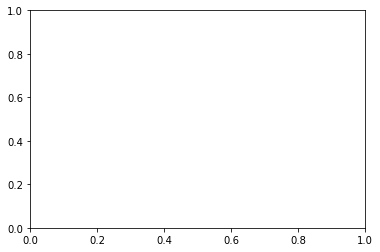

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color = 'red')

### Balidazioa (1pt) 
Overfitting-ik ba al duzu?

## Testeo Finala (2Pt)
"FifaTest.csv" izeneko artxiboa utzi dizut. Bertan, orainarte ikusi gabeko datuak dauzkagu. Nola funzionatzen du gure algoritmoak datu hauetan?
TESTEKO DATUAK GARBI DAUDE! ez daukate NaN-ik
### egin predikzioa eta atera balidaziorako erabilitako metrika (1pt)
### Metrika hori 0.9 baino hobea bada, puntu extra irabazi duzu (1Pt)